## Roll no.35    UId:209046


# Diabetes Prediction

### This is a classification problem of supervised machine learning. The objective is to predict whether or not a patient has diabetes, based on certain diagonistic measurement included in the dataset.
0- Absence of Diabetes
1-Presence of Diabetes

In [96]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Predictor variables include the no. of pregnancies, their BMI, insulin level, age,glucose, blood pressure, skin thickness, diabetes pedigree function.

In [97]:
data=pd.read_csv('diabetes.csv')

In [98]:
data.shape


(1314, 9)

In [99]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [100]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1309,3,128,72,25,190,32.4,0.549,27,1
1310,10,90,85,32,0,34.9,0.825,56,1
1311,4,84,90,23,56,39.5,0.159,25,0
1312,1,88,78,29,76,32.0,0.365,29,0
1313,8,186,90,35,225,34.5,0.423,37,1


In [101]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Data Exploration

<AxesSubplot:xlabel='Outcome', ylabel='count'>

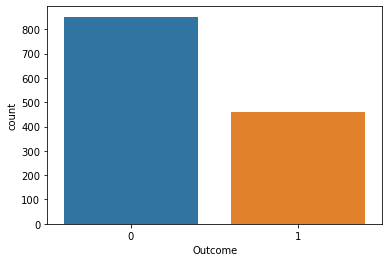

In [102]:
#plotting the distribution of outcome
sns.countplot(x='Outcome',data=data)

In [103]:
#check for null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [104]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000
mean,3.838661,120.606545,68.926941,20.504566,79.830289,31.927930,0.477479,33.215373,0.351598
std,3.365045,32.228638,19.445297,15.843303,115.983549,7.998854,0.334886,11.749351,0.477651
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.125000,0.246250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.380000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,126.000000,36.575000,0.637000,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


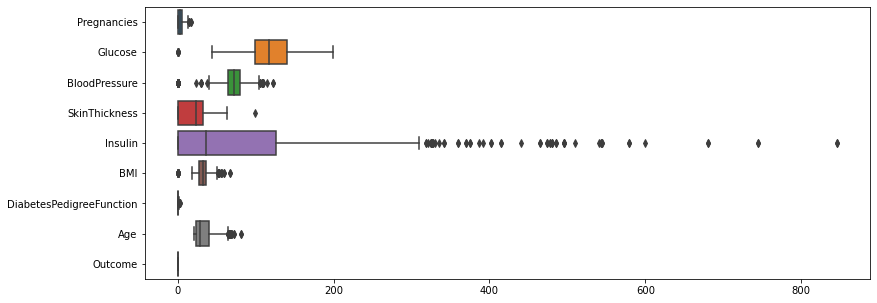

In [105]:
plt.figure(figsize=(13,5))
sns.boxplot(data=data,orient='h')
plt.show()

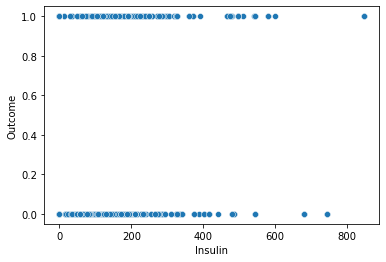

In [106]:
sns.scatterplot(x=data['Insulin'],y=data['Outcome'])
plt.show()

In [107]:
#check correlation
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.141996,0.129692,-0.078086,-0.066453,0.027671,-0.039029,0.539308,0.225330
Glucose,0.141996,1.000000,0.137500,0.042453,0.338621,0.221234,0.139558,0.267841,0.453820
BloodPressure,0.129692,0.137500,1.000000,0.210136,0.093516,0.274710,0.026953,0.230747,0.057215
SkinThickness,-0.078086,0.042453,0.210136,1.000000,0.442766,0.392211,0.181539,-0.124592,0.075470
Insulin,-0.066453,0.338621,0.093516,0.442766,1.000000,0.198785,0.194590,-0.029231,0.134664
BMI,0.027671,0.221234,0.274710,0.392211,0.198785,1.000000,0.138723,0.038549,0.299031
DiabetesPedigreeFunction,-0.039029,0.139558,0.026953,0.181539,0.194590,0.138723,1.000000,0.038342,0.175802
Age,0.539308,0.267841,0.230747,-0.124592,-0.029231,0.038549,0.038342,1.000000,0.224667
Outcome,0.225330,0.453820,0.057215,0.075470,0.134664,0.299031,0.175802,0.224667,1.000000


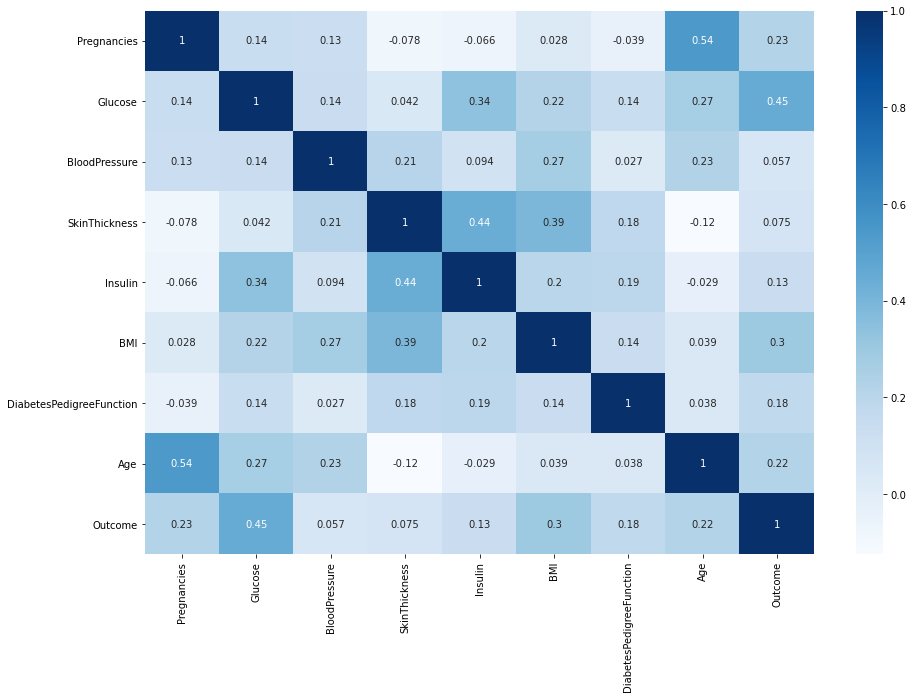

In [108]:
##check correlation
import seaborn as sns
correlation=data.corr()
plt.figure(figsize=(15,10))
colormap=plt.cm.Blues
g=sns.heatmap(data.corr(),annot=True,cmap=colormap)

From the correlation matrix we can see that there are no highly related correlated features.

In [109]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.141996,0.129692,-0.078086,-0.066453,0.027671,-0.039029,0.539308,0.225330
Glucose,0.141996,1.000000,0.137500,0.042453,0.338621,0.221234,0.139558,0.267841,0.453820
BloodPressure,0.129692,0.137500,1.000000,0.210136,0.093516,0.274710,0.026953,0.230747,0.057215
SkinThickness,-0.078086,0.042453,0.210136,1.000000,0.442766,0.392211,0.181539,-0.124592,0.075470
Insulin,-0.066453,0.338621,0.093516,0.442766,1.000000,0.198785,0.194590,-0.029231,0.134664
BMI,0.027671,0.221234,0.274710,0.392211,0.198785,1.000000,0.138723,0.038549,0.299031
DiabetesPedigreeFunction,-0.039029,0.139558,0.026953,0.181539,0.194590,0.138723,1.000000,0.038342,0.175802
Age,0.539308,0.267841,0.230747,-0.124592,-0.029231,0.038549,0.038342,1.000000,0.224667
Outcome,0.225330,0.453820,0.057215,0.075470,0.134664,0.299031,0.175802,0.224667,1.000000


In [110]:
diabetes_true_count=len(data.loc[data['Outcome']==1])
diabetes_false_count=len(data.loc[data['Outcome']==0])

In [111]:
(diabetes_true_count,diabetes_false_count)

(462, 852)

In [112]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.280516,109.840376,68.107981,19.624413,68.333333,30.167254,0.434142,31.272300
1,4.867965,140.461039,70.437229,22.127706,101.032468,35.174892,0.557398,36.798701


## Training the Data

In [113]:
#train test split

from sklearn.model_selection import train_test_split
feature_column=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target_column=['Outcome']

In [144]:
X=data[feature_column].values
y=data[target_column].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

Before we build the model, we will impute the zero vlaues in our dataset. If we check the head of the dataset, we will notice that there are some independent variables with zero values. This can make our model not efficient.

In [145]:
#checking how many zeros and missing values

print('total no. of rows : {0}'.format(len(data)))

print('no. of rows missing glucose : {0}'.format(len(data.loc[data['Glucose']==0])))
print('no. of rows missing bloodpressure : {0}'.format(len(data.loc[data['BloodPressure']==0])))
print('no. of rows missing insulin : {0}'.format(len(data.loc[data['Insulin']==0])))
print('no. of rows missing bmi : {0}'.format(len(data.loc[data['BMI']==0])))
print('no. of rows missing skinthickness : {0}'.format(len(data.loc[data['SkinThickness']==0])))
print('no. of rows missing diabetespedigreefunction : {0}'.format(len(data.loc[data['DiabetesPedigreeFunction']==0])))


total no. of rows : 1314
no. of rows missing glucose : 10
no. of rows missing bloodpressure : 62
no. of rows missing insulin : 637
no. of rows missing bmi : 20
no. of rows missing skinthickness : 386
no. of rows missing diabetespedigreefunction : 0


In [146]:
#imputing zeros values in the dataset
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values=0,strategy="mean")

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [147]:
#Apply Feature Scaling
#Data Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X=scaler.fit_transform(X)
print(X)


[[ 0.64253584  0.85029607  0.1580963  ...  0.20911829  0.44665444
   1.42910166]
 [-0.84389391 -1.10523135 -0.15057909 ... -0.66634027 -0.37782086
  -0.18862457]
 [ 1.23710775  1.9367002  -0.25347088 ... -1.07905645  0.58107976
  -0.10348109]
 ...
 [ 0.04796394 -1.13627147  1.08412245 ...  0.94700479 -0.95136889
  -0.69948549]
 [-0.84389391 -1.012111    0.46677168 ...  0.00901347 -0.33599965
  -0.35891154]
 [ 1.23710775  2.02982055  1.08412245 ...  0.32167724 -0.16274034
   0.32223634]]


## Classification Model

#### 1. Random Forest Classifier
#### 2. Decision Tree

###### To evaluate each model the metrics I will use are the following: Accuracy, Precision, Recall and Confusion matrix

Accuracy is usually a good metric when dealing with balanced datasets.
Predicting an healthy patient as affected by diabetes would result in furthur useless costs, but predicting a deseased one as healthy could result in serious consequences.So, here more importance will be given at detecting as many deseased patients as possible ( higher recall value) at the lower classification accuracy( lower precision score).



## random forest classifier

The Random Forest is an ensemble method specifically designed for Decision Tree classifiers. As an ensemble method, it generates several different weak learners and then it combines them in order to achieve an higher accuracy.





In [148]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model=RandomForestClassifier(criterion='gini',random_state=10)

random_forest_model.fit(X_train,y_train.ravel())

RandomForestClassifier(random_state=10)

In [149]:
predict_train_data=random_forest_model.predict(X_test)
from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test,predict_train_data)))

Accuracy = 0.881


In [150]:
from sklearn.metrics import precision_score,recall_score,accuracy_score
print(recall_score(y_test, predict_train_data))
print(precision_score(y_test, predict_train_data))
print(accuracy_score(y_test, predict_train_data))



0.8059701492537313
0.8372093023255814
0.8810126582278481


In [151]:
from sklearn.metrics import  confusion_matrix
print(confusion_matrix(y_test,predict_train_data))


[[240  21]
 [ 26 108]]


<AxesSubplot:>

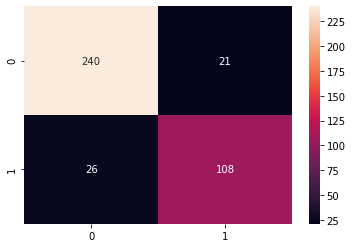

In [152]:
sns.heatmap(confusion_matrix(y_test,predict_train_data),annot=True,fmt='d')

## Decision Tree
It is represented by a tree of finite depth.Every node of the tree specifies a test specifies a test involving an attribute and every branch descending from that node matches one of the possible outcomes of the rest.Decision Trees are induced from a training set using a top-down approach, from the root to the leafs, by recursively binary spliting the predictor space. The attribute selected to perform each split is the one that partitions the training set into subsets as pure as possible.


In [153]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)


DecisionTreeClassifier()

In [154]:
prediction=dtree.predict(X_test)

In [155]:
from sklearn import metrics
print("accuracy score",format(metrics.accuracy_score(y_test,prediction)))

accuracy score 0.8379746835443038


In [156]:
from sklearn.metrics import precision_score,recall_score
print(recall_score(y_test, prediction))
print(precision_score(y_test, prediction))


0.7835820895522388
0.75


In [157]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,prediction))


[[226  35]
 [ 29 105]]


<AxesSubplot:>

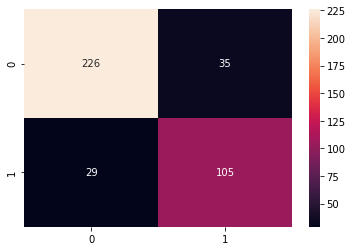

In [158]:
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,fmt='d')

## Conclusion

The decision tree is clearly not the ideal model as it scored both a low recall and a low precision. The Random forest is the one that provided the most balanced results between precision and recall and also a high overall accuracy score.